# Predicting the salary of employees with respect to Years of experience

In [11]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [12]:
#uploading the dataset
df = pd.read_csv("D://Salary_Data.csv")
print("Dataset loaded")

Dataset loaded


### Analyzing the dataset

In [13]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [14]:
df.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
df.shape

(30, 2)

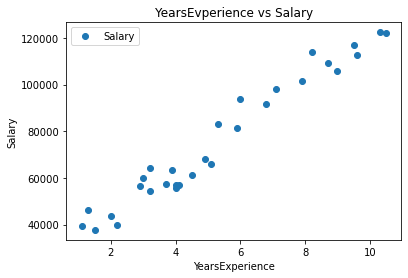

In [18]:
df.plot(x="YearsExperience",y="Salary",style="o")
plt.title("YearsEvperience vs Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

### From the graph we can visualize that the salary is linearly related to the years of experience . Hence we will use linear regression to predict salary .

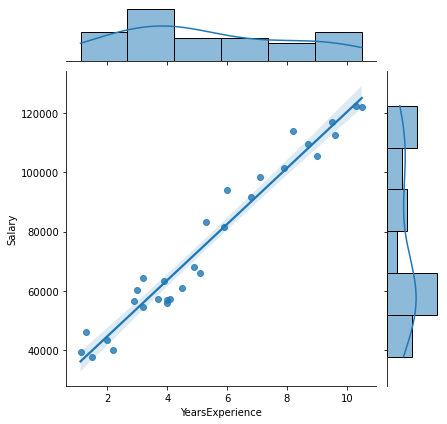

In [19]:
sns.jointplot(x="YearsExperience",y="Salary",data=df,kind='reg')

## Declaring the independent variable (x) and dependent variable (y)

In [20]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
print("coefficient :",regressor.coef_)

coefficient : [[9312.57512673]]


In [24]:
print("intercept :",regressor.intercept_)

intercept : [26780.09915063]


In [25]:
y_pred = regressor.predict(x_test)
db = pd.DataFrame({'Actual :': y_test.flatten(),'Predicted :':y_pred.flatten()})
print(db)

   Actual :    Predicted :
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


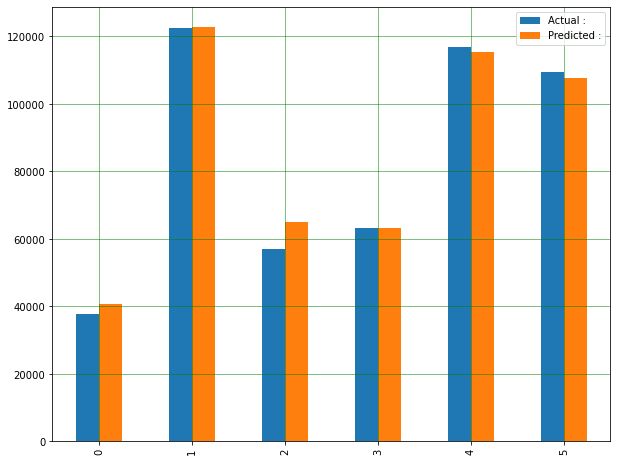

In [26]:
db.plot(kind='bar',figsize=(10,8))
plt.grid(which="major",linestyle='-',linewidth='0.5',color='green')
plt.grid(which="minor",linestyle=':',linewidth='0.5',color='red')
plt.show()

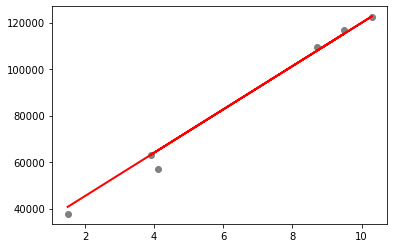

In [27]:
plt.scatter(x_test,y_test,color='grey')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

In [28]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error : 2446.1723690465064
Mean Squared Error : 12823412.298126562
Root Mean Squared Error : 3580.979237321345


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.988169515729126

## So we can see that our model is approximately 99% fit . 